In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np
import vegas
import random as rand
import pickle as rick

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_tau = 1776.86E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
Gam_Z = 2.4952

def d_t(m, x):
    return (m_h ** 2 - x) * (1 - 4 * (m ** 2 / x)) ** 0.5

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

def diff_decay_exact(s, t, m):
    SW = sin
    CW = cos
    pi = np.pi
    
    s = s_min_fix + (s_max_fix - s_min_fix) * x
    t = t_min(s, m) + (t_max(s, m) - t_min(s, m)) * y
    u = m_h ** 2 + 2 * m ** 2 - s - t
    
    N = 1 / (32 * (2 * pi) ** 3  * m_h ** 3)    
    struc_4 = N * 16*pi**2*alpha**2*m**2*(m_h**6*(-3*m**2 + t) + m_h**4*(7*m**4 + m**2*(5*s + 2*t) - t*(s + t)) + m_h**2*s*(-8*m**4 - m**2*(3*s + 8*t) + s*t) + s*(8*m**6 - m**4*(s + 16*t) + m**2*(s**2 + 10*s*t + 8*t**2) - s*t*(s + t)))/(SW**2*m_W**2*(m**2 - t)**2*(m**2 + m_h**2 - s - t)**2)
    
    return struc_4


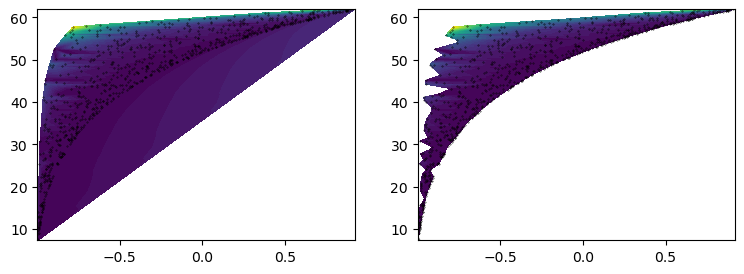

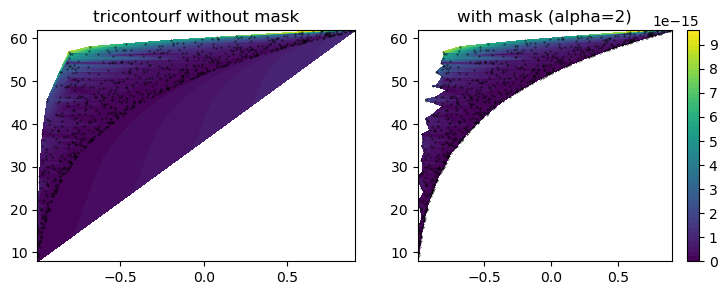

In [31]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

ss = []
ts = []
coslks = []
coslls = []
Els = []
Elbars = []
Ephots = []
z = []

for i in range(0, 10**3):
    x_0 = rand.random()
    x_1 = rand.random()
    s = s_min_fix + (s_max_fix - s_min_fix) * x_1
    t = t_min(s, m) + (t_max(s, m) - t_min(s, m)) * x_0
    u = m_h ** 2 + 2 * m ** 2 - s - t
    coslk = cos_lk(m, E_l(m, u), E_phot(m, s), t)
    cosll = cos_ll(m, E_l(m, u), E_lbar(m, t), s)
    Ephot = E_phot(m, s)
    El = E_l(m, u)
    Elbar = E_lbar(m, t)
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    struc_4 = N * 16*np.pi**2*alpha**2*m**2*(m_h**6*(-3*m**2 + t) + m_h**4*(7*m**4 + m**2*(5*s + 2*t) - t*(s + t)) + m_h**2*s*(-8*m**4 - m**2*(3*s + 8*t) + s*t) + s*(8*m**6 - m**4*(s + 16*t) + m**2*(s**2 + 10*s*t + 8*t**2) - s*t*(s + t)))/(sin**2*m_W**2*(m**2 - t)**2*(m**2 + m_h**2 - s - t)**2)

    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t >= (k * m_h) ** 2 and E_phot(m, s) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t) > 7) or (E_lbar(m, t) > 25 and E_l(m, u) > 7)):
        
        ts += [t]
        ss += [s]
        coslks += [coslk]
        coslls += [cosll]
        Els += [El]
        Elbars += [Elbar]
        Ephots += [Ephot]
        z += [struc_4]

x = np.array(coslks)
y = np.array(Elbars)
z = np.array(z)

triang1 = tri.Triangulation(x, y)
triang2 = tri.Triangulation(x, y)
triang3 = tri.Triangulation(x, y)

def apply_mask(triang, alpha):
    # Mask triangles with sidelength bigger some alpha
    triangles = triang.triangles
    # Mask off unwanted triangles.
    xtri = x[triangles] - np.roll(x[triangles], 1, axis=1)
    ytri = y[triangles] - np.roll(y[triangles], 1, axis=1)
    maxi = np.max(np.sqrt(xtri**2 + ytri**2), axis=1)
    # apply masking
    triang.set_mask(maxi > alpha)

#apply_mask(triang2, alpha=0.1)
alph = 2
n_levels = 50
apply_mask(triang3, alpha=alph)

fig, (ax1, ax3) = plt.subplots(ncols=2, figsize=(9,3))

ax1.tricontourf(triang1, z, n_levels)
ax1.scatter(x,y, s=0.1, color="k")

cs = ax3.tricontourf(triang3, z, n_levels)
ax3.scatter(x,y, s=0.1, color="k")
plt.colorbar(cs)

ax1.set_title("tricontourf without mask")
ax3.set_title("with mask (alpha="+str(alph)+")")

plt.show()

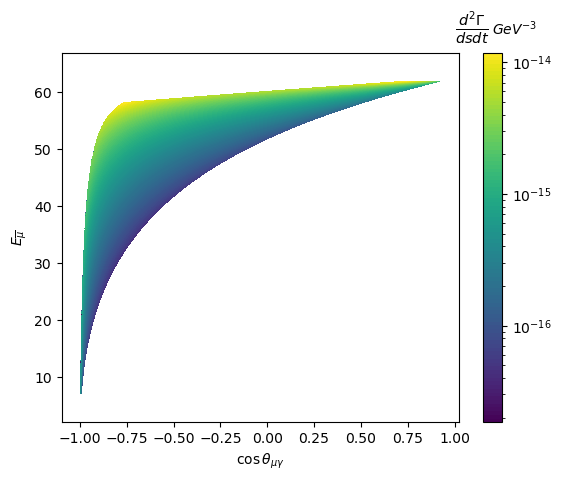

In [38]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

ss = []
ts = []
coslks = []
coslls = []
Els = []
Elbars = []
Ephots = []
z = []

for i in range(0, 10**6):
    x_0 = rand.random()
    x_1 = rand.random()
    s = s_min_fix + (s_max_fix - s_min_fix) * x_1
    t = t_min(s, m) + (t_max(s, m) - t_min(s, m)) * x_0
    u = m_h ** 2 + 2 * m ** 2 - s - t
    coslk = cos_lk(m, E_l(m, u), E_phot(m, s), t)
    cosll = cos_ll(m, E_l(m, u), E_lbar(m, t), s)
    Ephot = E_phot(m, s)
    El = E_l(m, u)
    Elbar = E_lbar(m, t)
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    struc_4 = N * 16*np.pi**2*alpha**2*m**2*(m_h**6*(-3*m**2 + t) + m_h**4*(7*m**4 + m**2*(5*s + 2*t) - t*(s + t)) + m_h**2*s*(-8*m**4 - m**2*(3*s + 8*t) + s*t) + s*(8*m**6 - m**4*(s + 16*t) + m**2*(s**2 + 10*s*t + 8*t**2) - s*t*(s + t)))/(sin**2*m_W**2*(m**2 - t)**2*(m**2 + m_h**2 - s - t)**2)

    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t >= (k * m_h) ** 2 and E_phot(m, s) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t) > 7) or (E_lbar(m, t) > 25 and E_l(m, u) > 7)):
        
        ts += [t]
        ss += [s]
        coslks += [coslk]
        coslls += [cosll]
        Els += [El]
        Elbars += [Elbar]
        Ephots += [Ephot]
        z += [struc_4]

x = np.array(coslks)
y = np.array(Elbars)
z = np.array(z)

triang3 = tri.Triangulation(x, y)

def apply_mask(triang, alpha):
    # Mask triangles with sidelength bigger some alpha
    triangles = triang.triangles
    # Mask off unwanted triangles.
    xtri = x[triangles] - np.roll(x[triangles], 1, axis=1)
    ytri = y[triangles] - np.roll(y[triangles], 1, axis=1)
    maxi = np.max(np.sqrt(xtri**2 + ytri**2), axis=1)
    # apply masking
    triang.set_mask(maxi > alpha)

alph = 0.1
n_levels = 100
apply_mask(triang3, alpha=alph)

#cs = plt.tricontourf(triang3, z, n_levels)
#plt.colorbar(cs)

cs = plt.tricontourf(triang3, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())

cbar = plt.colorbar(cs)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))


#ax3.scatter(x,y, s=0.1, color="k")
plt.text(1, 70, r'$\frac{d^{2}\Gamma}{dsdt}$', fontsize = 15)
plt.text(1.2, 70, r'$GeV^{-3}$', fontsize = 10)
plt.xlabel(r'$\cos{\theta_{\mu\gamma}}$')
plt.ylabel(r'$E_{\overline{\mu}}$ GeV')
plt.xlim(min(x)-0.1, max(x)+0.1)
plt.ylim(min(y)-5, max(y)+5)
plt.show()

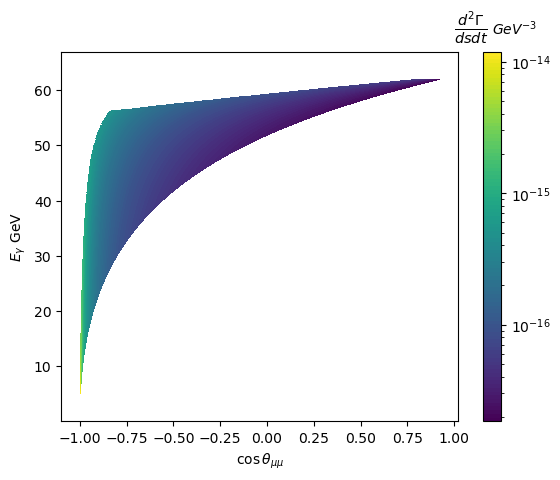

In [39]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

ss = []
ts = []
coslks = []
coslls = []
Els = []
Elbars = []
Ephots = []
z = []

for i in range(0, 10**6):
    x_0 = rand.random()
    x_1 = rand.random()
    s = s_min_fix + (s_max_fix - s_min_fix) * x_1
    t = t_min(s, m) + (t_max(s, m) - t_min(s, m)) * x_0
    u = m_h ** 2 + 2 * m ** 2 - s - t
    coslk = cos_lk(m, E_l(m, u), E_phot(m, s), t)
    cosll = cos_ll(m, E_l(m, u), E_lbar(m, t), s)
    Ephot = E_phot(m, s)
    El = E_l(m, u)
    Elbar = E_lbar(m, t)
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    struc_4 = N * 16*np.pi**2*alpha**2*m**2*(m_h**6*(-3*m**2 + t) + m_h**4*(7*m**4 + m**2*(5*s + 2*t) - t*(s + t)) + m_h**2*s*(-8*m**4 - m**2*(3*s + 8*t) + s*t) + s*(8*m**6 - m**4*(s + 16*t) + m**2*(s**2 + 10*s*t + 8*t**2) - s*t*(s + t)))/(sin**2*m_W**2*(m**2 - t)**2*(m**2 + m_h**2 - s - t)**2)

    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t >= (k * m_h) ** 2 and E_phot(m, s) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t) > 7) or (E_lbar(m, t) > 25 and E_l(m, u) > 7)):
        
        ts += [t]
        ss += [s]
        coslks += [coslk]
        coslls += [cosll]
        Els += [El]
        Elbars += [Elbar]
        Ephots += [Ephot]
        z += [struc_4]

x = np.array(coslls)
y = np.array(Ephots)
z = np.array(z)

triang3 = tri.Triangulation(x, y)

def apply_mask(triang, alpha):
    # Mask triangles with sidelength bigger some alpha
    triangles = triang.triangles
    # Mask off unwanted triangles.
    xtri = x[triangles] - np.roll(x[triangles], 1, axis=1)
    ytri = y[triangles] - np.roll(y[triangles], 1, axis=1)
    maxi = np.max(np.sqrt(xtri**2 + ytri**2), axis=1)
    # apply masking
    triang.set_mask(maxi > alpha)

alph = 0.1
n_levels = 100
apply_mask(triang3, alpha=alph)

#cs = plt.tricontourf(triang3, z, n_levels)
#plt.colorbar(cs)

cs = plt.tricontourf(triang3, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())

cbar = plt.colorbar(cs)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))


#ax3.scatter(x,y, s=0.1, color="k")
plt.text(1, 70, r'$\frac{d^{2}\Gamma}{dsdt}$', fontsize = 15)
plt.text(1.2, 70, r'$GeV^{-3}$', fontsize = 10)
plt.xlabel(r'$\cos{\theta_{\mu\mu}}$')
plt.ylabel(r'$E_{\gamma}$ GeV')
plt.xlim(min(x)-0.1, max(x)+0.1)
plt.ylim(min(y)-5, max(y)+5)
plt.show()

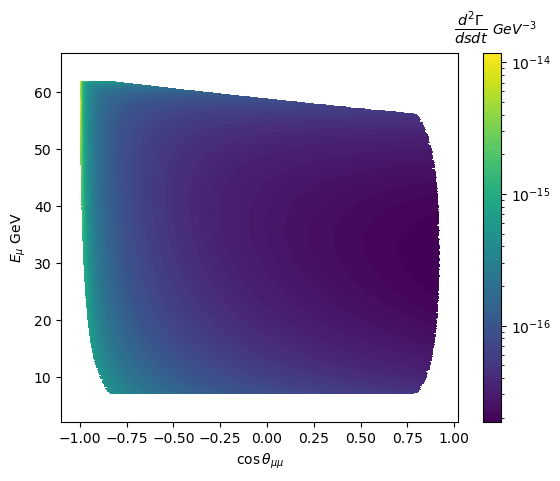

In [40]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

ss = []
ts = []
coslks = []
coslls = []
Els = []
Elbars = []
Ephots = []
z = []

for i in range(0, 10**6):
    x_0 = rand.random()
    x_1 = rand.random()
    s = s_min_fix + (s_max_fix - s_min_fix) * x_1
    t = t_min(s, m) + (t_max(s, m) - t_min(s, m)) * x_0
    u = m_h ** 2 + 2 * m ** 2 - s - t
    coslk = cos_lk(m, E_l(m, u), E_phot(m, s), t)
    cosll = cos_ll(m, E_l(m, u), E_lbar(m, t), s)
    Ephot = E_phot(m, s)
    El = E_l(m, u)
    Elbar = E_lbar(m, t)
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    struc_4 = N * 16*np.pi**2*alpha**2*m**2*(m_h**6*(-3*m**2 + t) + m_h**4*(7*m**4 + m**2*(5*s + 2*t) - t*(s + t)) + m_h**2*s*(-8*m**4 - m**2*(3*s + 8*t) + s*t) + s*(8*m**6 - m**4*(s + 16*t) + m**2*(s**2 + 10*s*t + 8*t**2) - s*t*(s + t)))/(sin**2*m_W**2*(m**2 - t)**2*(m**2 + m_h**2 - s - t)**2)

    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t >= (k * m_h) ** 2 and E_phot(m, s) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t) > 7) or (E_lbar(m, t) > 25 and E_l(m, u) > 7)):
        
        ts += [t]
        ss += [s]
        coslks += [coslk]
        coslls += [cosll]
        Els += [El]
        Elbars += [Elbar]
        Ephots += [Ephot]
        z += [struc_4]

x = np.array(coslls)
y = np.array(Els)
z = np.array(z)

triang3 = tri.Triangulation(x, y)

def apply_mask(triang, alpha):
    # Mask triangles with sidelength bigger some alpha
    triangles = triang.triangles
    # Mask off unwanted triangles.
    xtri = x[triangles] - np.roll(x[triangles], 1, axis=1)
    ytri = y[triangles] - np.roll(y[triangles], 1, axis=1)
    maxi = np.max(np.sqrt(xtri**2 + ytri**2), axis=1)
    # apply masking
    triang.set_mask(maxi > alpha)

alph = 0.1
n_levels = 100
apply_mask(triang3, alpha=alph)

#cs = plt.tricontourf(triang3, z, n_levels)
#plt.colorbar(cs)

cs = plt.tricontourf(triang3, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())

cbar = plt.colorbar(cs)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))


#ax3.scatter(x,y, s=0.1, color="k")
plt.text(1, 70, r'$\frac{d^{2}\Gamma}{dsdt}$', fontsize = 15)
plt.text(1.2, 70, r'$GeV^{-3}$', fontsize = 10)
plt.xlabel(r'$\cos{\theta_{\mu\mu}}$')
plt.ylabel(r'$E_{\mu}$ GeV')
plt.xlim(min(x)-0.1, max(x)+0.1)
plt.ylim(min(y)-5, max(y)+5)
plt.show()